### Checking whether the funcitonn to add true north is dynamic 

In [1]:
import geopandas as gpd
from pattern.text.en import singularize
import cartopy.crs as ccrs
import numpy as np


import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib.pyplot as plt 
from matplotlib_scalebar.scalebar import ScaleBar

/opt/anaconda3/envs/SLResearch/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

In [3]:
shapefile = gpd.read_file(r"/Users/sashanksilwal/Desktop/SLResearch/NoteBooks/Week2/Example_data/Conwy.shx")

In [4]:
shapefile

,LU,Status,Slope,geometry
0,1.0,4.0,8.0,"POLYGON ((281250.000 382000.000, 281450.000 38..."
1,2.0,4.0,10.0,"POLYGON ((281450.000 382000.000, 281650.000 38..."
2,2.0,NaN,13.0,"POLYGON ((281670.000 381800.000, 281850.000 38..."
3,1.0,4.0,8.0,"POLYGON ((281230.000 381800.000, 281250.000 38..."
4,1.0,NaN,6.0,"POLYGON ((280850.000 381800.000, 281230.000 38..."
...,...,...,...,...
1624,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1625,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1626,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1627,NaN,4.0,6.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."


In [8]:
shapefile.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°45'N to 61°N, 9°W to 2°E
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

Text(0.9, 0.8, 'N')

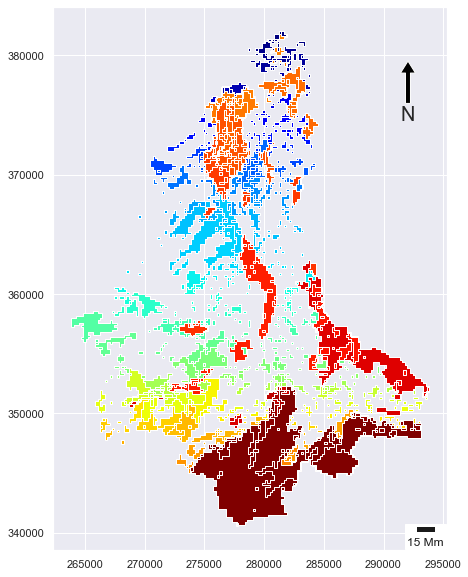

In [24]:
fig, ax = plt.subplots(1, figsize=(10,10))
shapefile.plot(ax=ax, cmap='jet', legend=True, legend_kwds={'loc': 'lower right'});
leg = ax.get_legend()
# leg.set_bbox_to_anchor((1.3, 0., 0.2, 0.2))
scalebar = ScaleBar(10, "km", length_fraction=0.05, location='lower right')
# scalebar = ScaleBar(location='lower right')
# scale_bar(ax, 100)
ax.add_artist(scalebar)

x, y, arrow_length = .9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot
https://stackoverflow.com/questions/63727080/geopandas-uniting-land-masses-and-coastal-buffer-polygons

In [12]:
import geopandas as gpd
soa_shape_map_path = r"New_example_data/shapefile/shapefile/UAE_habitats_new1.shx"
soa_shape_map = gpd.read_file(soa_shape_map_path)
soa_shape_map

,OBJECTID,Id,HabitatTyp,HabitatT_1,HabitatSub,HabitatS_1,RuleID,Shape_Leng,Shape_Area,Habitats,geometry
0,1,1,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,7.524321e+03,2.115300e+06,Intertidal Habitats,"POLYGON ((53.99011 24.13066, 53.99039 24.13065..."
1,2,2,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,4.870493e+04,7.777595e+06,Intertidal Habitats,"POLYGON ((54.07207 24.15920, 54.07776 24.15455..."
2,3,3,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,2.721521e+03,1.367130e+05,Intertidal Habitats,"POLYGON ((54.10483 24.16618, 54.10465 24.16584..."
3,4,4,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,1.001023e+04,1.424318e+06,Intertidal Habitats,"POLYGON ((54.03827 24.17414, 54.03834 24.17400..."
4,5,5,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,6.023903e+04,1.222009e+07,Intertidal Habitats,"POLYGON ((54.17323 24.19203, 54.17294 24.19172..."
...,...,...,...,...,...,...,...,...,...,...,...
68407,68408,27749,17000,Deep Sub-Tidal Seabed,17000,Deep Sub-Tidal Seabed,13,6.779433e+03,2.321405e+06,Deep Sub-Tidal Seabed,"POLYGON ((51.86066 24.64255, 51.85864 24.64164..."
68408,68409,27750,17000,Deep Sub-Tidal Seabed,17000,Deep Sub-Tidal Seabed,13,2.949082e+03,4.308493e+05,Deep Sub-Tidal Seabed,"POLYGON ((51.78022 24.68265, 51.78028 24.68244..."
68409,68410,27751,17000,Deep Sub-Tidal Seabed,17000,Deep Sub-Tidal Seabed,13,8.547824e+04,4.761868e+07,Deep Sub-Tidal Seabed,"POLYGON ((51.68765 24.67259, 51.68587 24.67217..."
68410,68411,27752,17000,Deep Sub-Tidal Seabed,17000,Deep Sub-Tidal Seabed,13,1.392197e+05,1.043467e+08,Deep Sub-Tidal Seabed,"POLYGON ((51.82734 24.71405, 51.82756 24.71068..."


In [13]:
soa_shape_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
soa_shape_map_geo = soa_shape_map
print(soa_shape_map_geo)

       OBJECTID     Id  HabitatTyp             HabitatT_1  HabitatSub  \
0             1      1        1000    Intertidal Habitats        1010   
1             2      2        1000    Intertidal Habitats        1010   
2             3      3        1000    Intertidal Habitats        1010   
3             4      4        1000    Intertidal Habitats        1010   
4             5      5        1000    Intertidal Habitats        1010   
...         ...    ...         ...                    ...         ...   
68407     68408  27749       17000  Deep Sub-Tidal Seabed       17000   
68408     68409  27750       17000  Deep Sub-Tidal Seabed       17000   
68409     68410  27751       17000  Deep Sub-Tidal Seabed       17000   
68410     68411  27752       17000  Deep Sub-Tidal Seabed       17000   
68411     68412  27753       17000  Deep Sub-Tidal Seabed       17000   

                                  HabitatS_1  RuleID    Shape_Leng  \
0      Mudflats And Sand Exposed At Low Tide      14 

In [15]:
print(soa_shape_map_geo.iloc[0].geometry.centroid.y, soa_shape_map_geo.iloc[0].geometry.centroid.x)

24.12542566442906 53.99526467366637


In [16]:
# .to_crs(epsg=4326, inplace=True)

In [17]:
soa_shape_map.Habitats.value_counts()

Farmland                     16494
Hard-Bottom                   9995
Developed                     7113
Unconsolidated Bottom         6641
Forest Plantations            5557
Seagrass Bed                  4967
Coral Reefs                   4673
Sand Sheets and Dunes         4463
Gravel Plains                 2682
Mountains                     1067
Dredged Area Wall              817
Coastal Salt Flats             742
Inland Salt Flats              606
Mangroves                      557
Intertidal Habitats            487
Marine Structure               447
Lakes or Artificial Lakes      193
Mega Dunes                     191
Saltmarsh                      175
Coastal Sand Plains            173
Dredged Seabed                 162
Sandy Beaches                   79
Deep Sub-Tidal Seabed           51
Wetlands                        36
Rocky Beaches                   31
Coastal Rocky Plains            12
Coastal Cliff                    1
Name: Habitats, dtype: int64

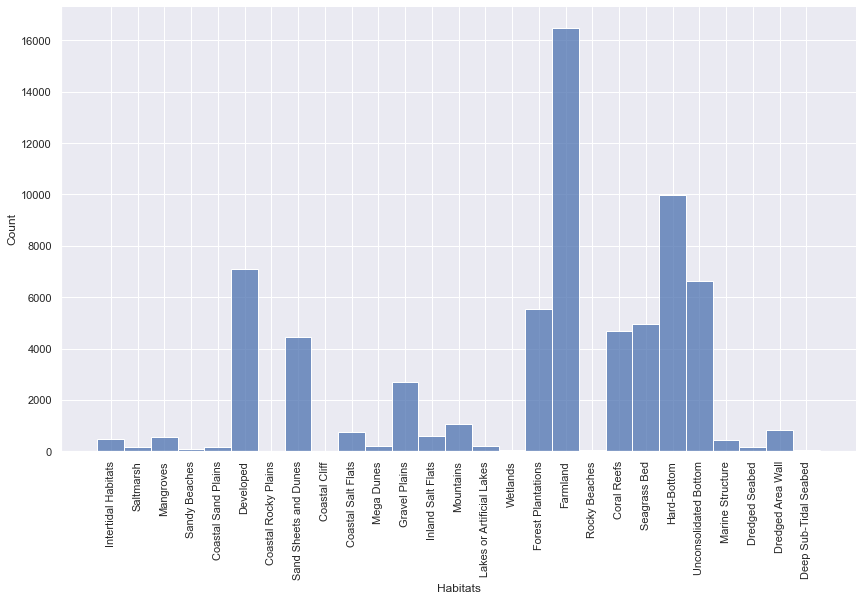

In [18]:
sns.displot(soa_shape_map, x="Habitats", height=7, aspect=1.75)
labels = plt.xticks(rotation=90)

https://contextily.readthedocs.io/en/latest/intro_guide.html